In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("data_510.csv", sep=",")
long = data.set_index('Unnamed: 0').stack().to_frame().reset_index()\
           .rename(columns={'level_1': 'variable', 0: 'value'})
long = long.drop(["Unnamed: 0"], axis = 1)
data = data.drop(["Unnamed: 0"], axis = 1)

In [22]:
for node in data.keys():
    print(f"\n---{node}---")
    print(f"mean: {np.mean(data[node])}")
    print(f"std: {np.std(data[node])}")
    for node_2 in data.keys():
        a, b = np.array(data[node].tolist()), np.array(data[node_2].tolist())
        ab = np.stack((a,b))
        cov = np.corrcoef(ab)
        if node != node_2:
            print(f"corr with {node_2}: {cov[0,1]}")


---A---
mean: 1.3765394413711143
std: 1.8986537427850416
corr with B: -0.10144640302789483
corr with C: 0.5204651714146851
corr with D: 0.8992934354859883

---B---
mean: 0.16267503613041234
std: 0.6111682236368067
corr with A: -0.10144640302789483
corr with C: -0.08037953995390523
corr with D: -0.3849599824480891

---C---
mean: 0.39185801595646763
std: 1.0666641262607672
corr with A: 0.5204651714146851
corr with B: -0.08037953995390522
corr with D: 0.4720957138214843

---D---
mean: 1.7838644052407013
std: 2.102160457276018
corr with A: 0.8992934354859883
corr with B: -0.3849599824480891
corr with C: 0.4720957138214843


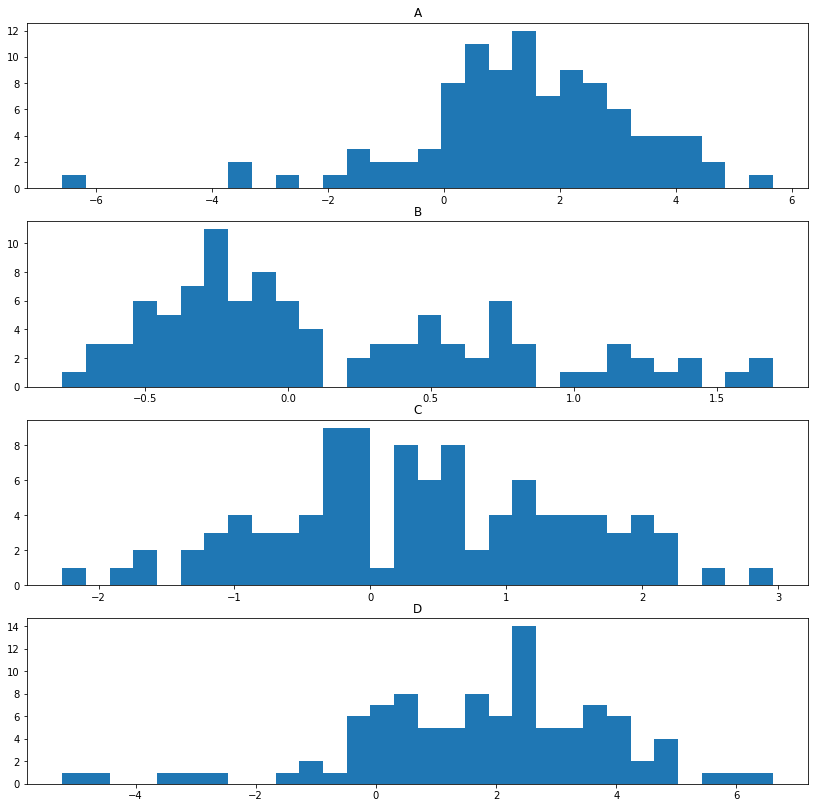

In [6]:
fig, axs = plt.subplots(4, figsize=(14,14))
for i, node in enumerate(data.keys()):
    axs[i].title.set_text(f"{node}")
    axs[i].hist(data[node], bins=30)
plt.show()

In [18]:
long

,variable,value
0,A,0.822987
1,B,-0.273670
2,C,2.161439
3,D,2.096656
4,A,5.671705
...,...,...
395,D,2.877161
396,A,-1.262539
397,B,1.610901
398,C,1.213952
